# Default Prediction and Business Insights -  American Express

## Problem Statement

Global Waterhouse Consulting has been approached by American Express, one of the leading Financial Institutions all over the globe to solve a burning issue at their organization: Customers getting defaulted. The CIO of the Company is worried that while they have been doing well in terms of acquiring new customers and servicing them with world class infrastructure, Amex is unable to make use of huge data of their customers to make business decisions to create a measurable economic benefit - increased revenue or reduced expenses or reduce the risk by minimizing loss.

### Intorduction 

The goal of this analysis is to find the significant factors that can be used to predict credit card default. This will done using logistic regression analysis of the records available. The steps of analysis will be:

1. Loading necessary libraries and the dataset
2. Exploratory Data Analysis and Data Exploration
4. Setting dummy variables for categorical variables, and normalizing the scale of numerical variables
5. Running the regression and comparable model
6. Drawing conclusions
7. Future Scope

#### Loading necessary libraries and the dataset

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random
import re

# Loading the datasets

In [2]:
data=pd.read_csv("DataSights_Dataset.csv")
data.head(10)

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0
5,CST_123268,Sarah Marsh,46,F,Y,N,0.0,252765.91,2898.0,Accountants,2.0,1.0,37046.86,40245.64,19,937.0,0,0,0
6,CST_127502,Mason,38,M,N,Y,1.0,262389.20,5541.0,High skill tech staff,3.0,0.0,50839.39,41311.08,42,733.0,0,0,0
7,CST_151722,Saba,46,F,Y,Y,1.0,241211.39,1448.0,Core staff,3.0,0.0,30008.46,32209.22,91,906.0,0,0,0
8,CST_133768,Ashutosh,40,F,NaN,Y,0.0,210091.43,11551.0,Laborers,2.0,0.0,21521.89,65037.74,14,783.0,0,0,0
9,CST_111670,David Milliken,39,F,Y,Y,2.0,207109.13,2791.0,High skill tech staff,4.0,0.0,9509.10,28425.52,14,666.0,0,0,0


In [3]:
data.describe(include='all')

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
count,45528,45528,45528.000000,45528,44981,45528,44754.000000,4.552800e+04,45065.000000,45528,45445.000000,45441.000000,45433.000000,4.552800e+04,45528.00000,45520.000000,45528.000000,45528.000000,45528.000000
unique,45528,4010,NaN,3,2,2,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,CST_107267,Jonathan,NaN,F,N,Y,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,207,NaN,29957,29743,31642,NaN,NaN,NaN,14299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,38.993411,NaN,NaN,NaN,0.420655,2.006556e+05,67609.289293,NaN,2.158081,0.179111,31796.965311,4.354842e+04,52.23502,782.791257,0.060710,0.050540,0.081203
std,NaN,NaN,9.543990,NaN,NaN,NaN,0.724097,6.690740e+05,139323.524434,NaN,0.911572,0.383450,17269.727234,1.487847e+05,29.37691,100.619746,0.264629,0.219059,0.273149
min,NaN,NaN,23.000000,NaN,NaN,NaN,0.000000,2.717061e+04,2.000000,NaN,1.000000,0.000000,2237.470000,4.003140e+03,0.00000,500.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,31.000000,NaN,NaN,NaN,0.000000,1.263458e+05,936.000000,NaN,2.000000,0.000000,19231.140000,2.397381e+04,27.00000,704.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,39.000000,NaN,NaN,NaN,0.000000,1.717149e+05,2224.000000,NaN,2.000000,0.000000,29081.650000,3.568804e+04,54.00000,786.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,47.000000,NaN,NaN,NaN,1.000000,2.406038e+05,5817.000000,NaN,3.000000,0.000000,40561.150000,5.343576e+04,78.00000,867.000000,0.000000,0.000000,0.000000


#### Some initial observations.

1. For every 25 percentile increase the age increases by 8.Hence the age seems to be uniformly distributed throughout the dataset.

2. Some names seems to be repeated but the customer_id is not repeated which means that there might be entries of a person with multiple credit cards.

3. 14299 entries contain occupation_type labelled as 'unknown'.

### Checking for dtypes of columns.

In [4]:
dt=pd.DataFrame(columns=["dtype","total"])
dtypes=data.dtypes.value_counts()
dt.dtype=list(dtypes.index)
dt.total=list(dtypes.values)
dt=dt.style.set_properties(**{'background-color':'yellow','color':'black'})
dt.set_table_attributes("style='display:inline'").set_caption("Data types of the columns")

,dtype,total
0,float64,8
1,object,6
2,int64,5


In [5]:
col_type=pd.DataFrame(columns=["Column_names","data_types"])
col_data=data.dtypes
col_type["Column_names"]=list(col_data.index)
col_type["data_types"]=list(col_data.values)
col_type.sort_values(by='data_types',inplace=True)
col_type.reset_index(inplace=True,drop=True)
col_type

,Column_names,data_types
0,credit_card_default,int64
1,prev_defaults,int64
2,age,int64
3,credit_limit_used(%),int64
4,default_in_last_6months,int64
5,credit_score,float64
6,credit_limit,float64
7,no_of_children,float64
8,net_yearly_income,float64
9,no_of_days_employed,float64


In [6]:
categorical_columns=list(col_type.Column_names[(col_type.data_types=='object')].values)
numerical_columns=list(col_type.Column_names[(col_type.data_types=='float64') | (col_type.data_types=='int64')].values)

In [7]:
data.name.value_counts().sort_values(ascending=False)[:10]

Jonathan            207
Jonathan Stempel    192
David               170
Stempel             165
Jessica             162
Sarah               147
Lucia               142
Nick                140
Lucia Mutikani      137
Caroline            133
Name: name, dtype: int64

In [8]:
data[data.name=="Jonathan Stempel"][:10]

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
254,CST_113854,Jonathan Stempel,41,F,N,Y,0.0,121548.28,365240.0,Unknown,1.0,0.0,7385.18,35876.02,82,848.0,0,0,0
741,CST_109433,Jonathan Stempel,31,F,Y,Y,0.0,486061.51,5459.0,Managers,2.0,0.0,48519.66,118311.52,15,896.0,0,0,0
833,CST_114457,Jonathan Stempel,44,F,N,Y,0.0,140730.45,365246.0,Unknown,2.0,0.0,24214.94,16437.61,44,709.0,0,0,0
1048,CST_100560,Jonathan Stempel,30,F,N,N,0.0,52400.34,365249.0,Unknown,2.0,0.0,12266.65,7660.66,78,668.0,0,0,0
1223,CST_105262,Jonathan Stempel,37,F,Y,Y,0.0,268306.08,1114.0,Unknown,2.0,0.0,10086.52,94377.10,95,901.0,0,0,0
1322,CST_115792,Jonathan Stempel,54,F,N,Y,0.0,334404.45,7070.0,Managers,1.0,0.0,41187.90,60366.88,92,806.0,0,0,0
1492,CST_105671,Jonathan Stempel,39,M,N,N,1.0,286833.32,2455.0,Unknown,3.0,1.0,50236.16,69358.03,37,881.0,0,0,0
1776,CST_113496,Jonathan Stempel,38,M,Y,Y,0.0,292351.99,1793.0,Managers,1.0,0.0,25432.46,38372.74,75,782.0,0,0,0
1791,CST_104008,Jonathan Stempel,44,F,N,Y,0.0,138463.53,99.0,Laborers,1.0,1.0,11511.52,48535.94,69,668.0,0,0,0
1926,CST_111049,Jonathan Stempel,42,F,N,Y,1.0,155590.54,704.0,Private service staff,3.0,0.0,21134.33,31302.79,99,740.0,0,0,0


#### Assumption 

Our assumption regarding multiple entries of a person with different uid holdilng different credit cards seems to be wrong since it seems that different people with same name exists and the uid is given to each person and not to each credit card of different companies owned by a person.Since,the name column doesn't seem to provide valuable information,it needs to be dropped so that the computational costs would be reduced.

In [9]:
numeric_data=data[numerical_columns]
print(numeric_data.shape)

(45528, 13)


In [10]:
numeric_data.corr()

,credit_card_default,prev_defaults,age,credit_limit_used(%),default_in_last_6months,credit_score,credit_limit,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments
credit_card_default,1.000000,0.771704,-0.000983,0.326641,0.776078,-0.543164,0.012250,0.023689,0.011508,-0.047043,0.010754,0.034013,-0.013089
prev_defaults,0.771704,1.000000,0.001393,0.252505,0.811353,-0.471421,-0.004302,0.019528,-0.004696,-0.036232,0.010608,0.029202,-0.012738
age,-0.000983,0.001393,1.000000,-0.005529,-0.001406,0.000817,0.004473,-0.009082,0.004079,0.000506,-0.010640,-0.005519,-0.002453
credit_limit_used(%),0.326641,0.252505,-0.005529,1.000000,0.253684,-0.174420,0.003109,0.007487,0.002696,-0.018720,0.001928,0.010198,-0.006850
default_in_last_6months,0.776078,0.811353,-0.001406,0.253684,1.000000,-0.450712,0.015759,0.021620,0.015092,-0.034295,0.013411,0.029964,-0.011619
credit_score,-0.543164,-0.471421,0.000817,-0.174420,-0.450712,1.000000,-0.009685,-0.014673,-0.009688,0.035533,-0.011524,-0.013319,0.005756
credit_limit,0.012250,-0.004302,0.004473,0.003109,0.015759,-0.009685,1.000000,0.009354,0.993378,-0.027745,0.010251,-0.000110,0.075169
no_of_children,0.023689,0.019528,-0.009082,0.007487,0.021620,-0.014673,0.009354,1.000000,0.008939,-0.243088,0.880278,0.070673,0.028706
net_yearly_income,0.011508,-0.004696,0.004079,0.002696,0.015092,-0.009688,0.993378,0.008939,1.000000,-0.029367,0.010432,0.001478,0.076958
no_of_days_employed,-0.047043,-0.036232,0.000506,-0.018720,-0.034295,0.035533,-0.027745,-0.243088,-0.029367,1.000000,-0.229344,-0.219521,-0.104545


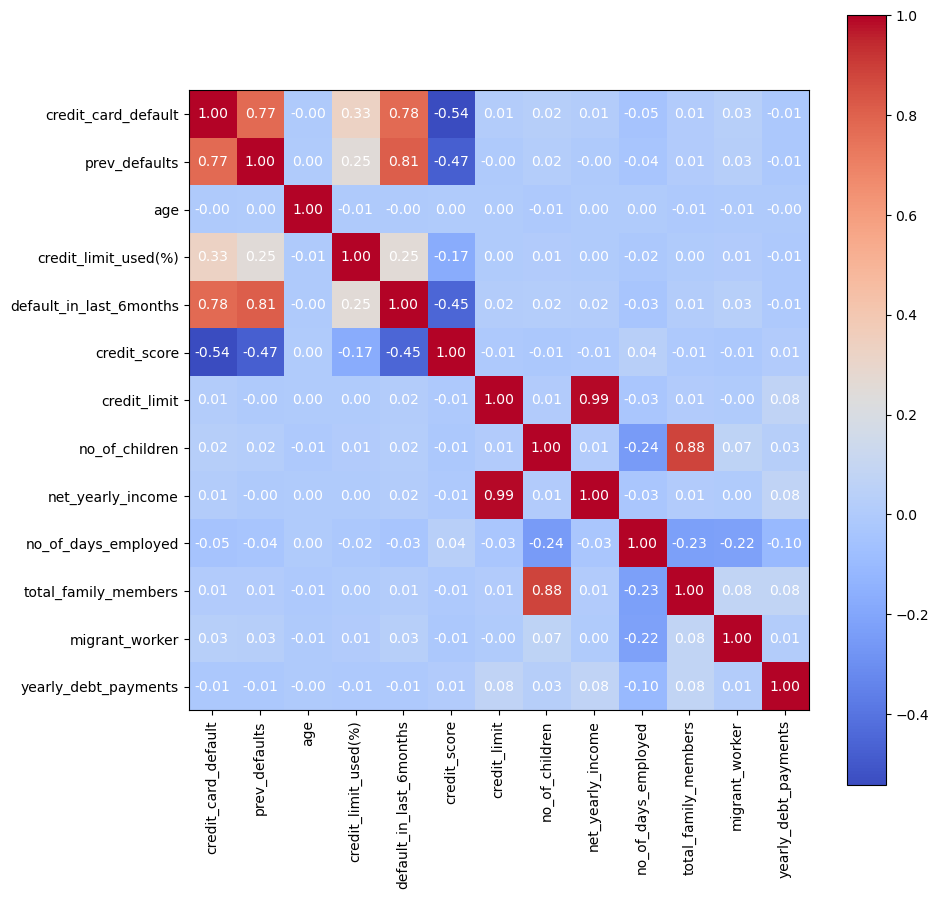

In [11]:
def correlation_plot(numeric_data):
    plt.imshow(numeric_data.corr(),cmap='coolwarm',interpolation='none')
    plt.colorbar()
    plt.xticks(range(len(numeric_data.columns)),numeric_data.columns,rotation=90)
    plt.yticks(range(len(numeric_data.columns)),numeric_data.columns)
    plt.gcf().set_size_inches(10,10)

    labels=numeric_data.corr().values
    #print(labels.shape)
    for y in range(labels.shape[0]):
        for x in range(labels.shape[1]):
            plt.text(x,y,'{:.2f}'.format(labels[y,x]),ha='center',va='center',color='white')


correlation_plot(numeric_data)

From the above figure we can see that "no_of_children" and "total_family_members" are highly correlated.
Hence,dropping one of them
also,"prev_default" and "default_in_last_6months" seems to be highly correlated.
"credit_limit" and "net_yearly_income" also seems to be highly correlated.

The important features with respect to the target variable are **default_in_last_6_months,prev_Defaults,credit_score and credit_limit_used(%)**.

# Exploratory Data Analysis and Data Preprocessing

In [12]:
mod_data=data.copy()
mod_data.dropna(inplace=True)
max_val=mod_data.net_yearly_income.max()
indx=mod_data[mod_data.net_yearly_income==max_val].index
print(indx.values[0])
mod_data.drop(labels=[indx.values[0]],axis=0,inplace=True)

26662


In [13]:
idxs=mod_data.index
data1=data.yearly_debt_payments[idxs]
data2=data.total_family_members[idxs]
data3=data.no_of_children[idxs]

Text(0.5, 1.0, ' Occupation type vs Net yearly income')

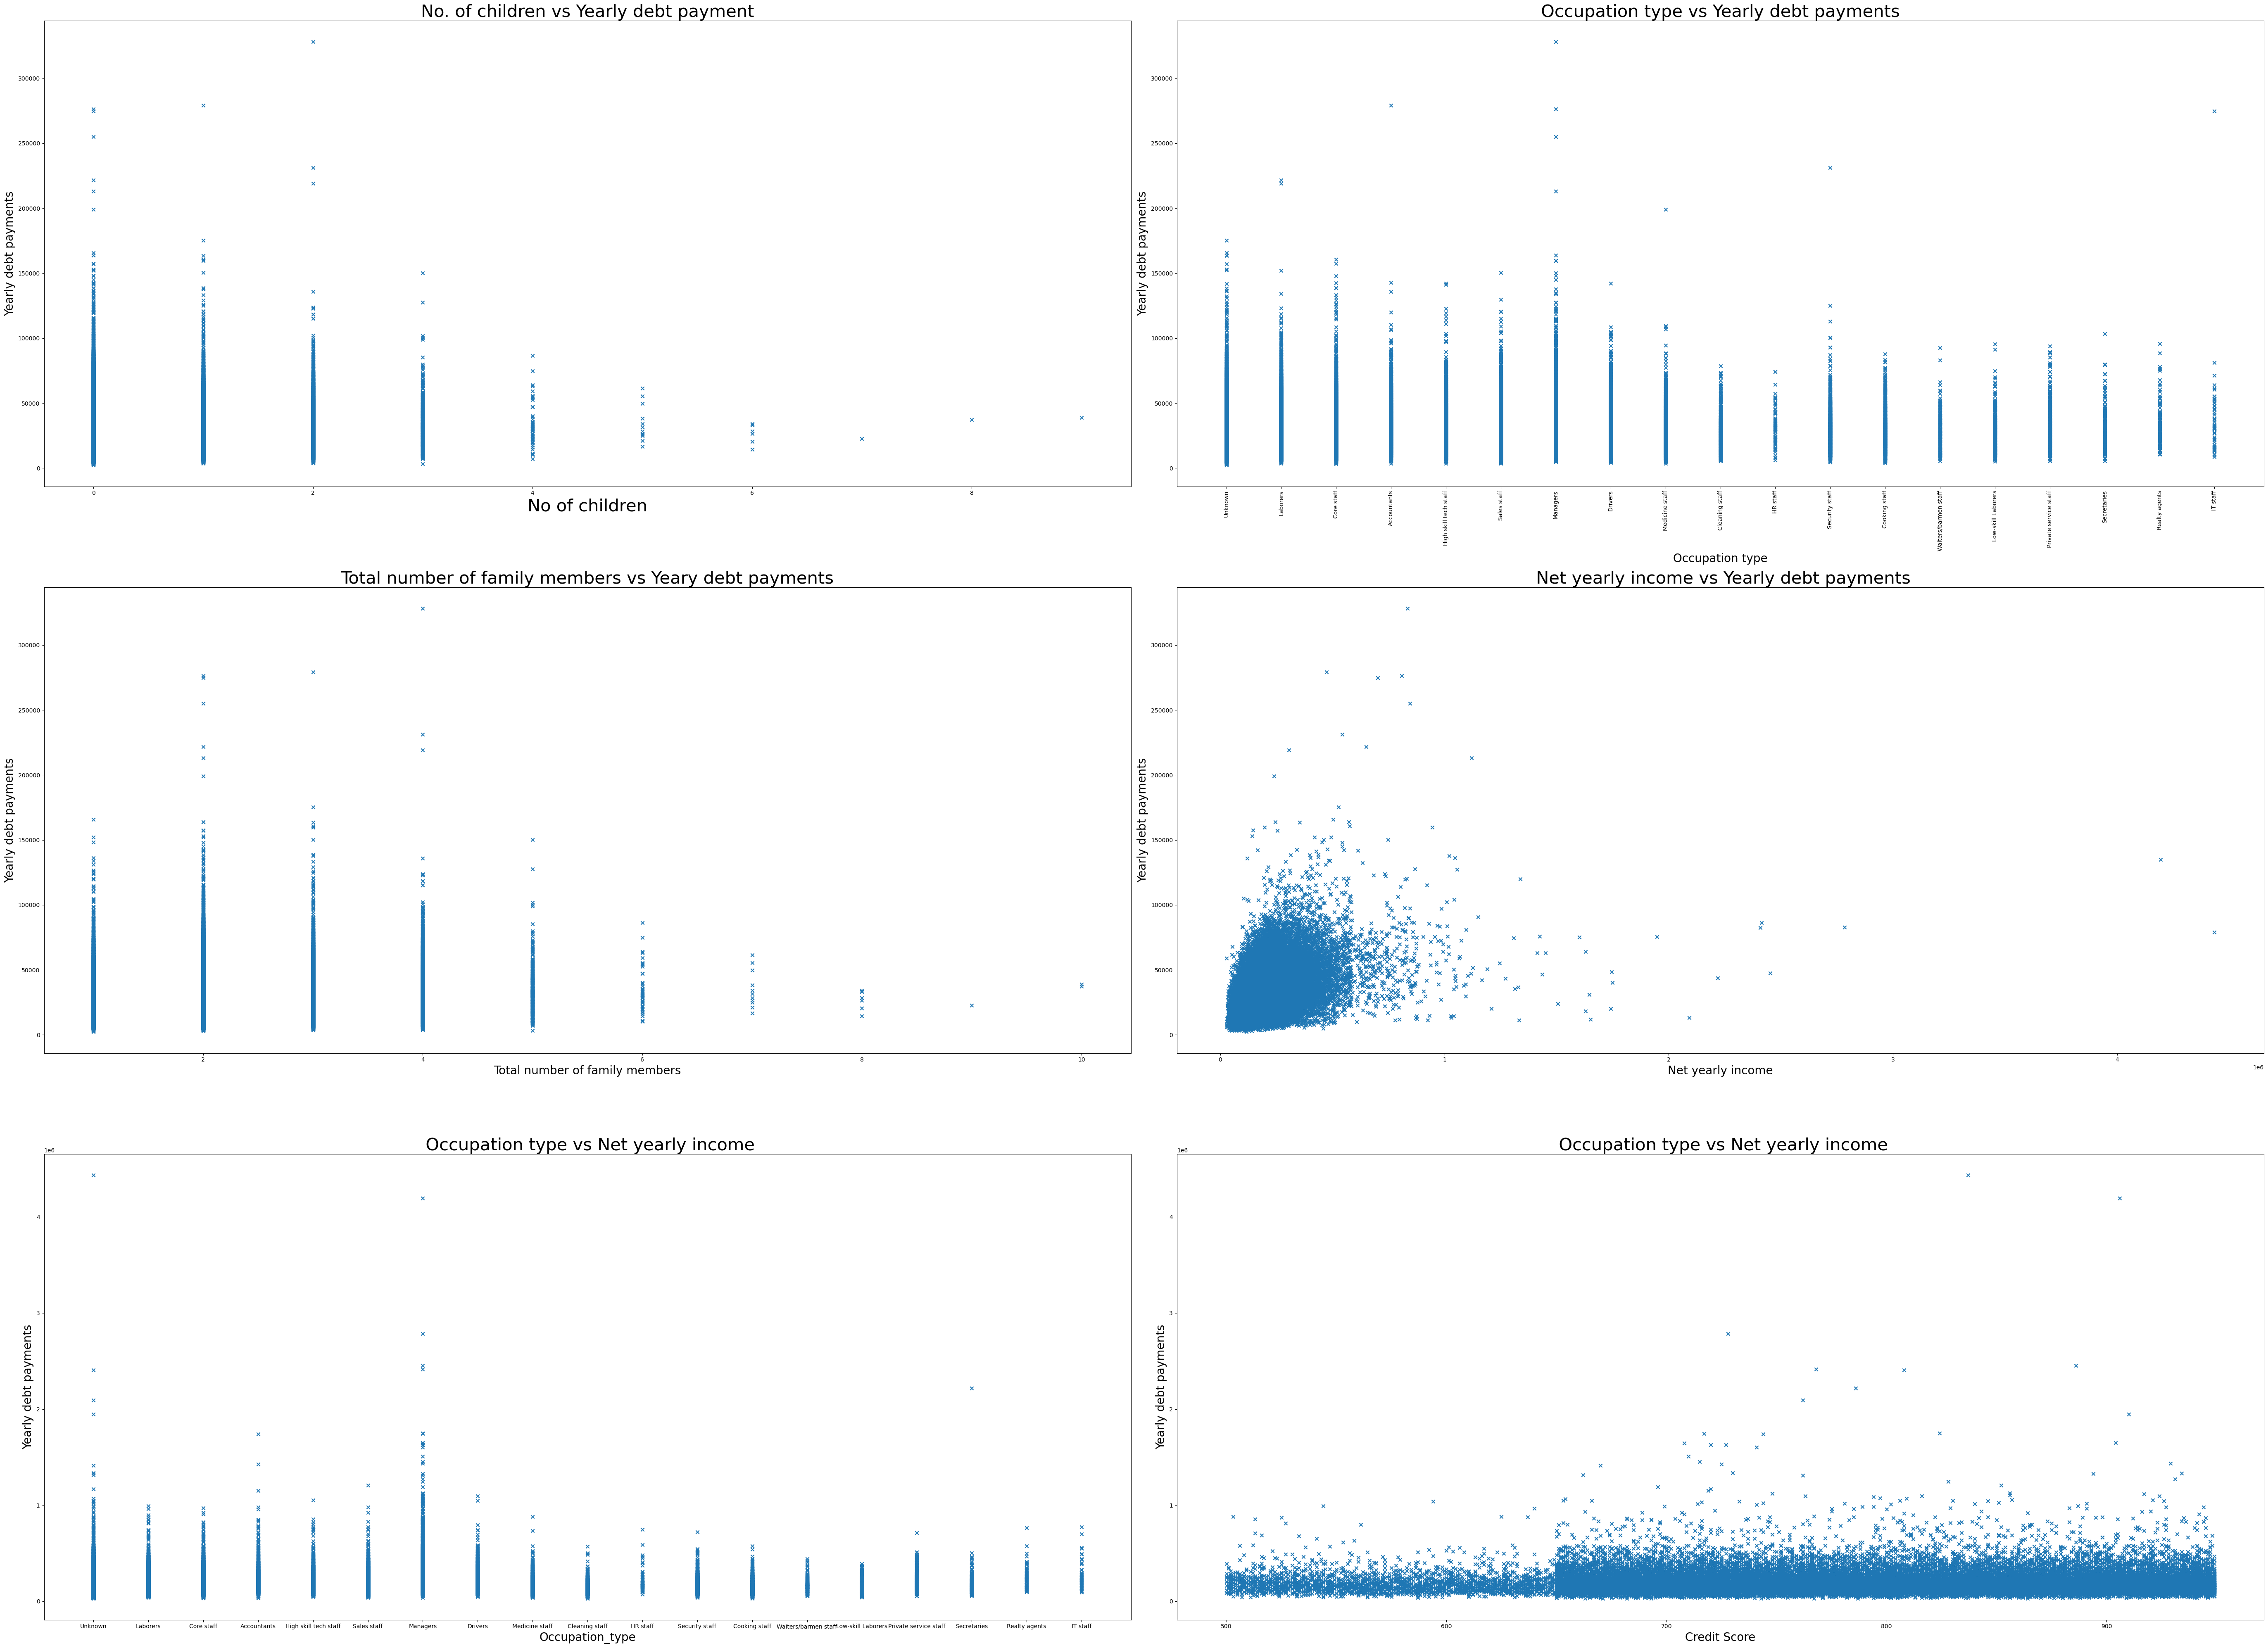

In [14]:
ROWS=3
COLS=2
fig,ax=plt.subplots(nrows=ROWS,ncols=COLS,figsize=(55,40),tight_layout=True)
ax[0][0].scatter(data3,data1,marker='x')
ax[0][0].set_xlabel("No of children",fontsize=30)
ax[0][0].set_ylabel("Yearly debt payments",fontsize=20)
ax[0][0].set_title("No. of children vs Yearly debt payment",fontsize=30)
ax[0][1].scatter(mod_data.occupation_type[idxs],data1,marker='x')
ax[0][1].tick_params(axis='x', labelrotation = 90)
ax[0][1].set_xlabel("Occupation type",fontsize=20)
ax[0][1].set_ylabel("Yearly debt payments",fontsize=20)
ax[0][1].set_title("Occupation type vs Yearly debt payments",fontsize=30)
#ax[0][1].x(rotation=90)
#ax[0][1].set_xticklabels(ax[0][1].get_xticks(),rotation=90)
ax[1][0].scatter(data2,data1,marker='x')
ax[1][0].set_xlabel("Total number of family members",fontsize=20)
ax[1][0].set_ylabel("Yearly debt payments",fontsize=20)
ax[1][0].set_title("Total number of family members vs Yeary debt payments",fontsize=30)
ax[1][1].scatter(mod_data.net_yearly_income[idxs],data1,marker='x')
ax[1][1].set_xlabel("Net yearly income",fontsize=20)
ax[1][1].set_ylabel("Yearly debt payments",fontsize=20)
ax[1][1].set_title(" Net yearly income vs Yearly debt payments",fontsize=30)
ax[2][0].scatter(mod_data.occupation_type[idxs],mod_data.net_yearly_income[idxs],marker='x')
ax[2][0].set_xlabel("Occupation_type",fontsize=20)
ax[2][0].set_ylabel("Yearly debt payments",fontsize=20)
ax[2][0].set_title(" Occupation type vs Net yearly income",fontsize=30)
ax[2][1].scatter(mod_data.credit_score[idxs],mod_data.net_yearly_income[idxs],marker='x')
ax[2][1].set_xlabel("Credit Score",fontsize=20)
ax[2][1].set_ylabel("Yearly debt payments",fontsize=20)
ax[2][1].set_title(" Occupation type vs Net yearly income",fontsize=30)

### Checking for missing values.

In [15]:
data.isnull().sum().sort_values(ascending=False)

no_of_children             774
owns_car                   547
no_of_days_employed        463
yearly_debt_payments        95
migrant_worker              87
total_family_members        83
credit_score                 8
credit_card_default          0
name                         0
age                          0
gender                       0
owns_house                   0
occupation_type              0
net_yearly_income            0
default_in_last_6months      0
credit_limit                 0
credit_limit_used(%)         0
prev_defaults                0
customer_id                  0
dtype: int64

### EDA and Feature Engineering

##### 1.)age column.

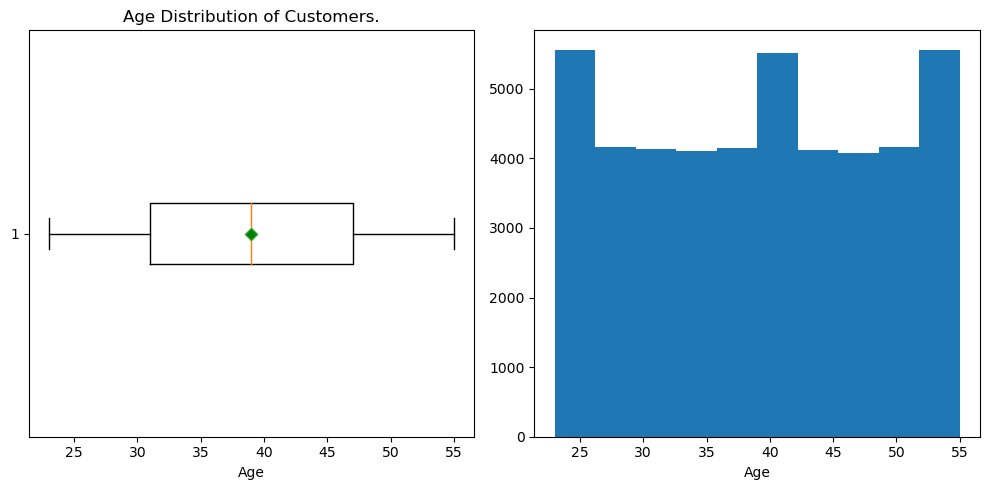

In [16]:
def age_eda():
    fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(10,5),tight_layout=True,squeeze=True,sharex='col')
    red_circle=dict(markerfacecolor='red',marker='o')
    mean=dict(markerfacecolor='green',marker='D')
    ax1.boxplot(x=data["age"],vert=False, flierprops=red_circle,showmeans=True,meanprops=mean)
    ax1.set_title("Age Distribution of Customers.")
    ax1.set_xlabel("Age")
    ax2.hist(data.age)
    ax2.set_xlabel("Age")

age_eda()

***The Age attribute almost follows a uniform distribution.***

##### b.) no_of_days_employed column

In [17]:
x=data["no_of_days_employed"]

In [18]:
print(f"Max number of days worked is {int(x.max())}.")

Max number of days worked is 365252.


In [19]:
print(f"Min number of days worked is {int(x.min())}.")

Min number of days worked is 2.


In [20]:
print(f"Mode for number of days worked is {int(x.mode())}.")

Mode for number of days worked is 365246.


In [21]:
x.value_counts().sort_values(ascending=False).head(15)

365246.0    684
365244.0    669
365240.0    641
365245.0    631
365241.0    628
365247.0    625
365250.0    609
365251.0    607
365243.0    607
365252.0    602
365249.0    601
365242.0    600
365248.0    594
183.0        29
201.0        26
Name: no_of_days_employed, dtype: int64

#### Please Note. : 

36,000 days itself would mean 98+ years of employment, which isn't really possible for someone. So we're considering the values over 30000 to be hours and converting them into days.

In [22]:
ddata=data[data.no_of_days_employed > 300000]
print(ddata.shape)
y=ddata.no_of_days_employed.unique()
print(y)

(8098, 19)
[365247. 365251. 365241. 365240. 365249. 365244. 365242. 365246. 365245.
 365243. 365248. 365250. 365252.]


In [23]:
def hrs_to_dys(column):
    if column>300000:
        column=column/(365*24)
        column=round(column,2)
    return column

data['no_of_days_employed']=data.no_of_days_employed.apply(lambda x:(hrs_to_dys(x)),1)

###### Missing value imputation

In [24]:
def days_employed_processing(data,value):
    data.no_of_days_employed.replace(np.nan,value,inplace=True)
value1=data['no_of_days_employed'].median()
days_employed_processing(data,value1)

<AxesSubplot:xlabel='no_of_days_employed', ylabel='Count'>

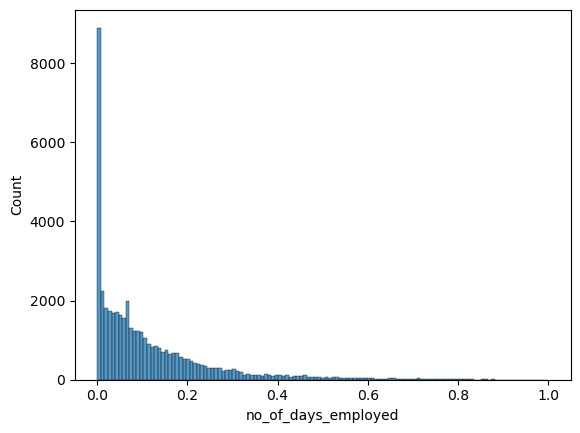

In [75]:
sns.histplot(data,x='no_of_days_employed')

In [26]:
data['no_of_days_employed'].describe()

count    45528.000000
mean      1975.753203
std       2318.319634
min          2.000000
25%        296.000000
50%       1217.000000
75%       2774.000000
max      17538.000000
Name: no_of_days_employed, dtype: float64

In [27]:
print(f"Most of the people are falling below {int(2774/365)} years of experience since 75% of the date falls below this point (3rd quartile).")

Most of the people are falling below 7 years of experience since 75% of the date falls below this point (3rd quartile).


##### c. yearly_debt_payments column.

In [28]:
debt=data.yearly_debt_payments

In [29]:
print(f"Max yearly debt payment is {int(debt.max())}.")

Max yearly debt payment is 328112.


In [30]:
print(f"Min yearly debt payment is {int(debt.min())}.")

Min yearly debt payment is 2237.


In [31]:
print(f"Mean yearly debt payment is {int(debt.mean())}.")

Mean yearly debt payment is 31796.


In [32]:
print(f"Median yearly debt payment is {int(debt.median())}.")

Median yearly debt payment is 29081.


In [33]:
print(f"3rd quartile for yearly debt payment is {debt.describe()['75%']}.")

3rd quartile for yearly debt payment is 40561.15.


##### Missing value imputation

In [34]:
def debt_payments_processing(data,value):
    data.yearly_debt_payments.replace(np.nan,value,inplace=True)
    #return data
value1=data['yearly_debt_payments'].mean()
debt_payments_processing(data,value1)

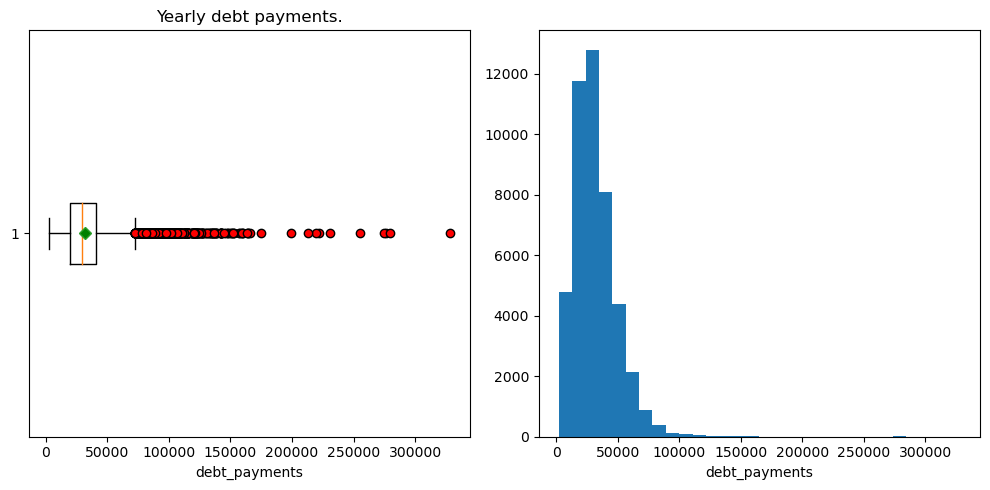

In [35]:
def box_plot_debt_payments():
    fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(10,5),tight_layout=True,squeeze=True,sharex='col')
    red_circle=dict(markerfacecolor='red',marker='o')
    mean=dict(markerfacecolor='green',marker='D')
    ax1.boxplot(x=data["yearly_debt_payments"],vert=False, flierprops=red_circle,showmeans=True,meanprops=mean)
    ax1.set_title("Yearly debt payments.")
    ax1.set_xlabel("debt_payments")
    ax2.hist(data.yearly_debt_payments,bins=30)
    ax2.set_xlabel("debt_payments")
box_plot_debt_payments()

We can see that the distribution for debt payments is highly skewed. We also got an idea about it from the difference between the 3rd quartile and the max value. From the boxplot, we can see that debt payments have quite a few outliers.

##### d.) credit_limit_used column.

(array([4247., 4132., 4187., 4271., 4111., 4192., 4203., 5336., 5569.,
        5280.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

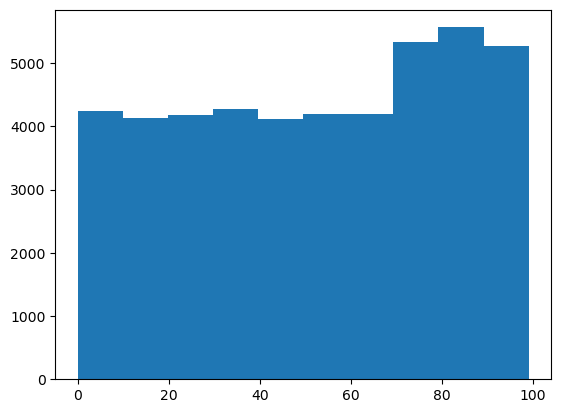

In [36]:
plt.hist(data['credit_limit_used(%)'])

In [37]:
data['credit_limit_used(%)'].describe()

count    45528.00000
mean        52.23502
std         29.37691
min          0.00000
25%         27.00000
50%         54.00000
75%         78.00000
max         99.00000
Name: credit_limit_used(%), dtype: float64

We can see from the quartiles and the histogram that a lot of people used above 78% of credit limit.

##### e.) total_family_members column.

In [38]:
tt=data.groupby('total_family_members',dropna=False)
tt.count()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
total_family_members,,,,,,,,,,,,,,,,,,
1.0,9913,9913,9913,9913,9802,9913,9721,9913,9913,9913,9891,9913,9913,9913,9910,9913,9913,9913
2.0,23455,23455,23455,23455,23160,23455,23058,23455,23455,23455,23406,23455,23455,23455,23451,23455,23455,23455
3.0,7812,7812,7812,7812,7709,7812,7698,7812,7812,7812,7799,7812,7812,7812,7812,7812,7812,7812
4.0,3623,3623,3623,3623,3591,3623,3564,3623,3623,3623,3620,3623,3623,3623,3622,3623,3623,3623
5.0,564,564,564,564,560,564,555,564,564,564,564,564,564,564,564,564,564,564
6.0,57,57,57,57,57,57,55,57,57,57,57,57,57,57,57,57,57,57
7.0,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
8.0,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
9.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


##### Missing value imputation

In [39]:
def func(row,val):
    if pd.isnull(row.total_family_members):
        row.total_family_members=val
    return row
u_values=sorted(list(data.total_family_members.unique()))[:5]
data=data.apply(lambda x:func(x,random.choice(u_values)),axis=1)

In [40]:
data.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [41]:
tt=data.groupby('total_family_members',dropna=False)
tt.count()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
total_family_members,,,,,,,,,,,,,,,,,,
1.0,9931,9931,9931,9931,9820,9931,9739,9931,9931,9931,9909,9931,9931,9931,9928,9931,9931,9931
2.0,23465,23465,23465,23465,23170,23465,23068,23465,23465,23465,23416,23465,23465,23465,23461,23465,23465,23465
3.0,7832,7832,7832,7832,7729,7832,7717,7832,7832,7832,7819,7832,7832,7832,7832,7832,7832,7832
4.0,3640,3640,3640,3640,3607,3640,3581,3640,3640,3640,3637,3640,3640,3640,3639,3640,3640,3640
5.0,582,582,582,582,577,582,573,582,582,582,582,582,582,582,582,582,582,582
6.0,57,57,57,57,57,57,55,57,57,57,57,57,57,57,57,57,57,57
7.0,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
8.0,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
9.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


##### f.) migrant_worker column.

**Missing value impuration**

In [42]:
def migrant_w_processing(data,value):
    data.migrant_worker.replace(np.nan,value,inplace=True)
    #return data
value=data.migrant_worker.unique()[0]
migrant_w_processing(data,value)

##### g.) credit score column.

In [43]:
neg_scr=data.credit_score[data.credit_card_default==1].mean()
pos_scr=data.credit_score[data.credit_card_default==0].mean()
pos_scr=round(pos_scr,2)
neg_scr=round(neg_scr,2)

In [44]:
def fill_na(row):
    if pd.isnull(row.credit_score) and row.credit_card_default==1:
        row.credit_score=neg_scr
    if pd.isnull(row.credit_score) and row.credit_card_default==0:
        row.credit_score=pos_scr
    return row
data=data.apply(lambda x:fill_na(x),axis=1)

#### Dropping columns with lot of missing values

In [45]:
data.prev_defaults.value_counts()

0    43060
1     2172
2      296
Name: prev_defaults, dtype: int64

In [46]:
data.default_in_last_6months.value_counts()

0    43227
1     2301
Name: default_in_last_6months, dtype: int64

*prev_default contains more information than default_in_last_6months since it describes the no. of times a customer became a defaulter rather than just describing weather the customer was a defaulter or not.*

In [47]:
data.drop(['owns_car'],axis=1,inplace=True)
data.drop(['no_of_children'],axis=1,inplace=True)
data.drop(['default_in_last_6months'],axis=1,inplace=True)

#### creating customer_id as the index.

In [48]:
mod_data=data.copy()
data['customer_id']=data['customer_id'].apply(lambda x:int(re.findall("\d.*[0-9]",str(x))[0]))
data.set_index('customer_id',inplace=True)

In [49]:
data.isnull().sum().sort_values(ascending=False)

credit_card_default     0
prev_defaults           0
credit_score            0
credit_limit_used(%)    0
credit_limit            0
yearly_debt_payments    0
migrant_worker          0
total_family_members    0
occupation_type         0
no_of_days_employed     0
net_yearly_income       0
owns_house              0
gender                  0
age                     0
name                    0
dtype: int64

**The data has no null values now, all the null values have either been dropped or imputed.**

## Feature Scaling for numeric values.

In [50]:
from sklearn.preprocessing import RobustScaler,MaxAbsScaler,QuantileTransformer

data3=data[['net_yearly_income','no_of_days_employed']]
scaler=RobustScaler()
data3=pd.DataFrame(scaler.fit_transform(data3),columns=data3.columns)
data3.set_index(data.index,inplace=True)

In [51]:
class Fscaling():
    def __init__(self):
        pass 

    #Scales data based on percentiles.
    def Robust_Scaler(self,data):
        typ=str(type(data)).split(".")[-1][:-2]
        if typ=="Series":
            data=pd.DataFrame(data)
        scaler=RobustScaler()
        mod_data=pd.DataFrame(scaler.fit_transform(data),columns=data.columns)
        mod_data.index=data.index
        return mod_data

    def Max_Abs_Scaler(self,data):
        typ=str(type(data)).split(".")[-1][:-2]
        if typ=="Series":
            data=pd.DataFrame(data)
        scaler=MaxAbsScaler()
        mod_data=pd.DataFrame(scaler.fit_transform(data),columns=data.columns)
        mod_data.index=data.index
        return mod_data

    #transforms the features to follow a uniform or normal distribution.
    #this transformation tends to spread out the most frequent values.
    #the cumulative distribution function(c.d.f) is used to project original values.
    #this transformation is non-linear
    def quantile_transformer(self,data):
        typ=str(type(data)).split(".")[-1][:-2]
        if typ=="Series":
            data=pd.DataFrame(data)
        scaler=QuantileTransformer()
        mod_data=pd.DataFrame(scaler.fit_transform(data),columns=data.columns)
        mod_data.index=data.index
        return mod_data

In [52]:
print(data.shape)

(45528, 15)


In [53]:
f_obj=Fscaling()
ret_data=f_obj.Robust_Scaler(data['net_yearly_income'])
data.drop(['net_yearly_income'],axis=1,inplace=True)
data=pd.concat([data,ret_data],axis=1)
ret_data=f_obj.Max_Abs_Scaler(data['no_of_days_employed'])
data.drop(['no_of_days_employed'],axis=1,inplace=True)
data=pd.concat([data,ret_data],axis=1)
ret_data=f_obj.quantile_transformer(data['yearly_debt_payments'])
data.drop(['yearly_debt_payments'],axis=1,inplace=True)
data=pd.concat([data,ret_data],axis=1)

##### Dropping unknown gender

In [54]:
data['gender'].value_counts()

F      29957
M      15570
XNA        1
Name: gender, dtype: int64

In [55]:
id=data[data.gender=="XNA"].index
data.drop(id,axis=0,inplace=True)

In [56]:
data['gender'].value_counts()

F    29957
M    15570
Name: gender, dtype: int64

In [57]:
X=data.drop(["credit_card_default","name"],axis=1,inplace=False)
y=data["credit_card_default"]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,train_size=0.80,test_size=0.20,random_state=42,shuffle=True,stratify=y)
print(ytrain.value_counts())
print(ytest.value_counts())

0    33463
1     2958
Name: credit_card_default, dtype: int64
0    8367
1     739
Name: credit_card_default, dtype: int64


In [58]:
data.head()

,name,age,gender,owns_house,occupation_type,total_family_members,migrant_worker,credit_limit,credit_limit_used(%),credit_score,prev_defaults,credit_card_default,net_yearly_income,no_of_days_employed,yearly_debt_payments
customer_id,,,,,,,,,,,,,,,
115179,ita Bose,46,F,Y,Unknown,1.0,1.0,18690.93,73,544.0,2,1,-0.558218,0.034896,0.600597
121920,Alper Jonathan,29,M,Y,Laborers,2.0,0.0,37745.19,52,857.0,0,0,-0.541339,0.158000,0.150865
109330,Umesh Desai,37,M,Y,Laborers,2.0,0.0,41598.36,43,650.0,0,0,0.511459,0.011632,0.850670
128288,Rie,39,F,Y,Core staff,2.0,0.0,32627.76,20,754.0,0,0,-0.432260,0.680864,0.327848
151355,McCool,46,M,Y,Core staff,1.0,0.0,52950.64,75,927.0,0,0,1.886706,0.083191,0.708841


## 3. Setting dummy variables for categorical variables, and normalizing the scale of numerical variables


### Encoding Categorical columns

In [59]:
categorical_columns

['customer_id', 'owns_car', 'gender', 'name', 'owns_house', 'occupation_type']

In [60]:
#Encoding categorical variables.
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

class Encoding:
    def __init__(self):
        self.ohenc=OneHotEncoder(handle_unknown='ignore',sparse=False)
        self.olenc=OrdinalEncoder()


    def ordinalencode(self,var_list,train=None,val=None,data=None):
        #self.intrdata=self.data.copy()
        if train is None and val is None:
            data[var_list]=self.olenc.transform(data[var_list])
            return data
        else:
            train[var_list]=self.olenc.fit_transform(train[var_list])
            val[var_list]=self.olenc.transform(val[var_list])
            return train,val

    def onehotencode(self,categorical_var_list,train=None,val=None,data=None):
        if train is None and val is None:
            self.test_data=data
            self.test_data=pd.DataFrame(self.ohenc.transform(self.test_data[categorical_var_list]))
            self.test_data.index=data.index
            self.num_test_data=data.drop(columns=categorical_var_list,axis=1)
            self.final_test_data=pd.concat([self.num_test_data,self.test_data],axis=1)
            return self.final_test_data
        else:
            self.oh_cols_train=pd.DataFrame(self.ohenc.fit_transform(train[categorical_var_list]))
            self.oh_cols_val=pd.DataFrame(self.ohenc.transform(val[categorical_var_list]))

            self.oh_cols_train.index=train.index
            self.oh_cols_val.index=val.index

            self.num_ohcols_train=train.drop(columns=categorical_var_list,axis=1)
            self.num_ohcols_val=val.drop(columns=categorical_var_list,axis=1)

            self.final_data_train=pd.concat([self.num_ohcols_train,self.oh_cols_train],axis=1)
            self.final_data_val=pd.concat([self.num_ohcols_val,self.oh_cols_val],axis=1)

            return self.final_data_train,self.final_data_val

In [61]:
en=Encoding()
xtrain,xtest=en.ordinalencode(["owns_house"],train=xtrain,val=xtest)

In [62]:
xtrain,xtest=en.onehotencode(["gender","occupation_type"],train=xtrain,val=xtest)

C:\Users\kpcr7\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## 4. Running the regression and comparable model

## Prediction

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
import pickle
import os

In [64]:
xtrain.head()

,age,owns_house,total_family_members,migrant_worker,credit_limit,credit_limit_used(%),credit_score,prev_defaults,net_yearly_income,no_of_days_employed,...,11,12,13,14,15,16,17,18,19,20
customer_id,,,,,,,,,,,,,,,,,,,,,
164920,38,1.0,2.0,0.0,22335.12,12,681.0,0,-0.670040,0.082450,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153597,38,1.0,2.0,1.0,26166.07,87,820.0,0,-0.409035,0.099441,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106429,46,1.0,2.0,0.0,40183.42,41,949.0,0,-0.261465,0.048637,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110261,42,1.0,1.0,0.0,43625.75,2,904.0,0,-0.412854,0.002377,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
150536,39,1.0,1.0,0.0,24872.90,25,722.0,0,-0.857526,0.005873,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
xtrain.columns = xtrain.columns.astype(str)
xtest.columns = xtest.columns.astype(str)

In [66]:
(ytrain.value_counts()/len(ytrain))*100

0    91.878312
1     8.121688
Name: credit_card_default, dtype: float64

## Note : 

We can see that this is a highly imbalanced dataset and hence we need to balance this dataset. Smote sampling method creates synthetic samples from the minority (class with low records) class.

### Synthetic Minority Oversampling Technique (SMOTE):

In [67]:
s = SMOTE(random_state=0)
smote_data_x, smote_data_y = s.fit_resample(xtrain, ytrain)
smote_data_x = pd.DataFrame(data = smote_data_x, columns = smote_data_x.columns)
smote_data_y = pd.DataFrame(data = smote_data_y, columns = ['credit_card_default'])

In [68]:
(smote_data_y.value_counts()/len(smote_data_y))*100

credit_card_default
1                      50.0
0                      50.0
dtype: float64

### Logistic Regression

In [69]:
reg_model=LogisticRegression(random_state=32,max_iter=1000)
reg_model.fit(smote_data_x,smote_data_y['credit_card_default'])

LogisticRegression(max_iter=1000, random_state=32)

In [70]:
y_pred = reg_model.predict(xtest)

In [71]:
print("Logistic regression model accuracy: {:.2f}%".format(reg_model.score(xtest,ytest)*100))

Logistic regression model accuracy: 92.50%


In [74]:
score_train=100*f1_score(y_pred,ytest,average='macro')
print(score_train)

81.41029808363767


### The F1 score for thr Random Forest Classifier is 81.41.

### Random Forest Classifier

In [72]:
tree_model=RandomForestClassifier(n_estimators=200)
tree_model.fit(smote_data_x,smote_data_y['credit_card_default'])
predicted_val=tree_model.predict(xtest)
score_train=100*f1_score(predicted_val,ytest,average='macro')
print(score_train)

92.95631132006433


### The F1 score for thr Random Forest Classifier is 92.86.

##  Drawing conclusions and Future Scope 

1. The regression shows that default is 0.99 as likely for every 10 years increase in age, 1.36 as likely for men, 1.00 as likely for 1000 dollars increase in income, 0.93 as likely for house owners, 0.73 as likely for car owners, 1.12 as likely for migrants, 1.98 as likely for every 10% increase in credit used, 31713236947.70 as likely for whose previously defaulted, 1.00 as likely for every additional month employed, 1.61 as likely for high default risk occupations, 0.99 as likely for every additional family member, 1.00 as likely for every 1000 dollars increase in yearly debt payment.

2. There doesn't seem to be a significant difference in the distribution of gender in the scatter plot above, but the regression suggests that men are more likely to default. It could be of value to explore the relationship between gender and income, and gender and other features such as lenght of employment and credit limit used.
